In [3]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt

In [4]:
data_path = 'datasets/dataset_500_samples_sin.csv'
data = pd.read_csv(data_path)
data = data[['x', 'y']]

x = data['x']
y = data['y']

# Data arrays, convert them to PyTorch tensors
x_tensor = torch.Tensor(x)
y_tensor = torch.Tensor(y)


# Define the Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(in_features=x_tensor.shape[0],
                             out_features=128)  # Adjust input features to match your data
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.fc3 = nn.Linear(in_features=64,
                             out_features=y_tensor.shape[0])  # Adjust output features to match your data

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Initialize the model, loss function, and optimizer
model = SimpleNN()

model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print(params)
criterion = nn.MSELoss()  # Assuming a regression problem; use CrossEntropyLoss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
for epoch in range(100):  # Number of epochs
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch + 1}/100], Loss: {loss.item():.4f}')

104884
Epoch [1/100], Loss: 2.6464
Epoch [2/100], Loss: 0.7498
Epoch [3/100], Loss: 0.6343
Epoch [4/100], Loss: 0.5951
Epoch [5/100], Loss: 0.5506
Epoch [6/100], Loss: 0.5189
Epoch [7/100], Loss: 0.5022
Epoch [8/100], Loss: 0.4862
Epoch [9/100], Loss: 0.4754
Epoch [10/100], Loss: 0.4683
Epoch [11/100], Loss: 0.4621
Epoch [12/100], Loss: 0.4526
Epoch [13/100], Loss: 0.4431
Epoch [14/100], Loss: 0.4339
Epoch [15/100], Loss: 0.4250
Epoch [16/100], Loss: 0.4158
Epoch [17/100], Loss: 0.4054
Epoch [18/100], Loss: 0.3935
Epoch [19/100], Loss: 0.3811
Epoch [20/100], Loss: 0.3685
Epoch [21/100], Loss: 0.3568
Epoch [22/100], Loss: 0.3444
Epoch [23/100], Loss: 0.3310
Epoch [24/100], Loss: 0.3176
Epoch [25/100], Loss: 0.3051
Epoch [26/100], Loss: 0.2924
Epoch [27/100], Loss: 0.2789
Epoch [28/100], Loss: 0.2651
Epoch [29/100], Loss: 0.2518
Epoch [30/100], Loss: 0.2395
Epoch [31/100], Loss: 0.2276
Epoch [32/100], Loss: 0.2158
Epoch [33/100], Loss: 0.2038
Epoch [34/100], Loss: 0.1920
Epoch [35/100], 

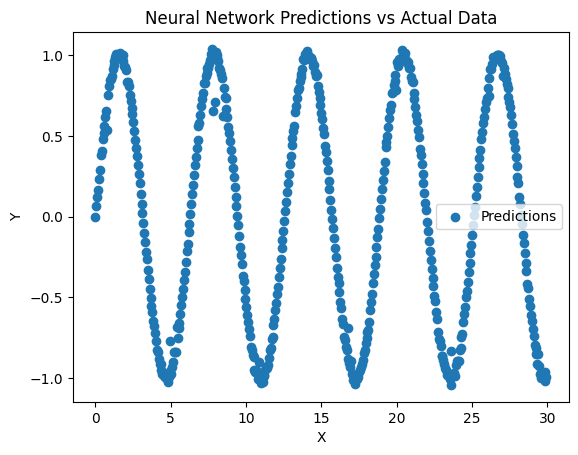

In [5]:
# Plotting predictions over actual data
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation
    predictions = model(x_tensor).numpy()

# plt.scatter(x, y, label='Actual Data', alpha=1)
plt.scatter(x, predictions, label='Predictions', alpha=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Neural Network Predictions vs Actual Data')
plt.legend()
plt.show()